In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
# STEP 1: Select a real world data.

In [2]:
football_uncleaned_df=pd.read_csv('E0.csv')


In [3]:
football_uncleaned_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.03,0.50,1.89,2.01,1.88,2.05,1.94,2.05,1.86,2.02
376,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,5.77,-3.75,2.03,1.87,2.01,1.88,2.06,1.88,2.02,1.84
377,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.40,1.00,1.94,1.96,1.95,1.97,2.03,2.00,1.95,1.92
378,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.01,-0.50,1.97,1.93,2.00,1.93,2.03,1.96,1.98,1.89


In [ ]:
# STEP 2: Data preparation and cleaning.

In [66]:
football_df=football_uncleaned_df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','HTR','FTR','Referee']]

In [67]:
football_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee
0,09/08/2019,Liverpool,Norwich,4,1,4,0,H,H,M Oliver
1,10/08/2019,West Ham,Man City,0,5,0,1,A,A,M Dean
2,10/08/2019,Bournemouth,Sheffield United,1,1,0,0,D,D,K Friend
3,10/08/2019,Burnley,Southampton,3,0,0,0,D,H,G Scott
4,10/08/2019,Crystal Palace,Everton,0,0,0,0,D,D,J Moss
...,...,...,...,...,...,...,...,...,...,...
375,26/07/2020,Leicester,Man United,0,2,0,0,D,A,M Atkinson
376,26/07/2020,Man City,Norwich,5,0,2,0,H,H,C Pawson
377,26/07/2020,Newcastle,Liverpool,1,3,1,1,D,A,A Taylor
378,26/07/2020,Southampton,Sheffield United,3,1,0,1,A,H,P Bankes


In [68]:
# 09-03-2020 last match before lockdown

In [69]:
football_df.Date=pd.to_datetime(football_df.Date, format="%d/%m/%Y")
football_df['month']=pd.DatetimeIndex(football_df.Date).month
football_df['Day_num']=pd.DatetimeIndex(football_df.Date).day

C:\Users\utsav\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-69-1da21b14b3fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_df['month']=pd.DatetimeIndex(football_df.Date).month
<ipython-input-69-1da21b14b3fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [70]:
flag1 = pd.Series(np.where(football_df.Date < np.datetime64('2020-03-09'), True, False), index=football_df.index)
football_df[flag1]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num
0,2019-08-09,Liverpool,Norwich,4,1,4,0,H,H,M Oliver,8,9
1,2019-08-10,West Ham,Man City,0,5,0,1,A,A,M Dean,8,10
2,2019-08-10,Bournemouth,Sheffield United,1,1,0,0,D,D,K Friend,8,10
3,2019-08-10,Burnley,Southampton,3,0,0,0,D,H,G Scott,8,10
4,2019-08-10,Crystal Palace,Everton,0,0,0,0,D,D,J Moss,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-03-07,Southampton,Newcastle,0,1,0,0,D,A,G Scott,3,7
283,2020-03-07,Wolves,Brighton,0,0,0,0,D,D,A Marriner,3,7
284,2020-03-07,Burnley,Tottenham,1,1,1,0,H,D,J Moss,3,7
285,2020-03-08,Chelsea,Everton,4,0,2,0,H,H,K Friend,3,8


In [71]:
flag2 = pd.Series(np.where(football_df.Date > np.datetime64('2020-03-09'), True, False), index=football_df.index)
football_df[flag2]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num
288,2020-06-17,Aston Villa,Sheffield United,0,0,0,0,D,D,M Oliver,6,17
289,2020-06-17,Man City,Arsenal,3,0,1,0,H,H,A Taylor,6,17
290,2020-06-19,Norwich,Southampton,0,3,0,0,D,A,K Friend,6,19
291,2020-06-19,Tottenham,Man United,1,1,1,0,H,D,J Moss,6,19
292,2020-06-20,Watford,Leicester,1,1,0,0,D,D,C Pawson,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...
375,2020-07-26,Leicester,Man United,0,2,0,0,D,A,M Atkinson,7,26
376,2020-07-26,Man City,Norwich,5,0,2,0,H,H,C Pawson,7,26
377,2020-07-26,Newcastle,Liverpool,1,3,1,1,D,A,A Taylor,7,26
378,2020-07-26,Southampton,Sheffield United,3,1,0,1,A,H,P Bankes,7,26


In [186]:
team='Man City'

In [187]:
team_df=football_df[(football_df.HomeTeam==team)|(football_df.AwayTeam==team)]
team_df['Team']=team
team_df

<ipython-input-187-6c9643500735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Team']=team


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,FTR,Referee,month,Day_num,Team
1,2019-08-10,West Ham,Man City,0,5,0,1,A,A,M Dean,8,10,Man City
16,2019-08-17,Man City,Tottenham,2,2,2,1,H,D,M Oliver,8,17,Man City
27,2019-08-25,Bournemouth,Man City,1,3,1,2,A,A,A Marriner,8,25,Man City
34,2019-08-31,Man City,Brighton,4,0,2,0,H,H,J Moss,8,31,Man City
46,2019-09-14,Norwich,Man City,3,2,2,1,H,H,K Friend,9,14,Man City
54,2019-09-21,Man City,Watford,8,0,5,0,H,H,M Dean,9,21,Man City
67,2019-09-28,Everton,Man City,1,3,1,1,D,A,M Oliver,9,28,Man City
77,2019-10-06,Man City,Wolves,0,2,0,0,D,A,C Pawson,10,6,Man City
87,2019-10-19,Crystal Palace,Man City,0,2,0,2,A,A,A Taylor,10,19,Man City
91,2019-10-26,Man City,Aston Villa,3,0,0,0,D,H,G Scott,10,26,Man City


In [188]:
team_df['GS']=0
team_df['GC']=0
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['GS'][i]=team_df['FTHG'][i]
        team_df['GC'][i]=team_df['FTAG'][i]
    else:
        team_df['GS'][i]=team_df['FTAG'][i]
        team_df['GC'][i]=team_df['FTHG'][i]

<ipython-input-188-491dfeb4c6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['GS']=0
<ipython-input-188-491dfeb4c6e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['GC']=0
<ipython-input-188-491dfeb4c6e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['GS'][i]=team_df['FTAG'][i]
C:\Users\ut

In [189]:
team_df['Result']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        if team_df['FTR'][i]=='H':
            team_df['Result'][i]='WIN'
        if team_df['FTR'][i]=='D':
            team_df['Result'][i]='DRAW'
        if team_df['FTR'][i]=='A':
            team_df['Result'][i]='LOSS'
    else:
        if team_df['FTR'][i]=='H':
            team_df['Result'][i]='LOSS'
        if team_df['FTR'][i]=='D':
            team_df['Result'][i]='DRAW'
        if team_df['FTR'][i]=='A':
            team_df['Result'][i]='WIN'

<ipython-input-189-4cb1e37ac637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Result']='a'
<ipython-input-189-4cb1e37ac637>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Result'][i]='WIN'
<ipython-input-189-4cb1e37ac637>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Result'][i]='DRAW'
<ipython-input-189-4cb1e37ac637>:5: SettingWithCopyWarning

In [190]:
team_df['Opponent']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['Opponent'][i]=team_df['AwayTeam'][i]
    else:
        team_df['Opponent'][i]=team_df['HomeTeam'][i]

<ipython-input-190-9fef282bdc73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Opponent']='a'
<ipython-input-190-9fef282bdc73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Opponent'][i]=team_df['HomeTeam'][i]
<ipython-input-190-9fef282bdc73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Opponent'][i]=team_df['AwayTeam'][i]


In [191]:
team_df['Fixture']='a'
for i in team_df.index:
    if team_df['HomeTeam'][i]==team:
        team_df['Fixture'][i]='Home'
    else:
        team_df['Fixture'][i]='Away'

<ipython-input-191-686b1b70a9f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Fixture']='a'
<ipython-input-191-686b1b70a9f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Fixture'][i]='Away'
<ipython-input-191-686b1b70a9f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Fixture'][i]='Home'


In [192]:
sns.set_style("darkgrid")

In [194]:
team_df=team_df.drop(['HTR','HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','FTR','month','Day_num'],axis=1)

In [195]:
team_df=team_df[['Date','Team','Fixture','Opponent','GS','GC','Result','Referee']]

In [196]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee
1,2019-08-10,Man City,Away,West Ham,5,0,WIN,M Dean
16,2019-08-17,Man City,Home,Tottenham,2,2,DRAW,M Oliver
27,2019-08-25,Man City,Away,Bournemouth,3,1,WIN,A Marriner
34,2019-08-31,Man City,Home,Brighton,4,0,WIN,J Moss
46,2019-09-14,Man City,Away,Norwich,2,3,LOSS,K Friend
54,2019-09-21,Man City,Home,Watford,8,0,WIN,M Dean
67,2019-09-28,Man City,Away,Everton,3,1,WIN,M Oliver
77,2019-10-06,Man City,Home,Wolves,0,2,LOSS,C Pawson
87,2019-10-19,Man City,Away,Crystal Palace,2,0,WIN,A Taylor
91,2019-10-26,Man City,Home,Aston Villa,3,0,WIN,G Scott


In [197]:
team_df['Total_GS']=team_df.GS.cumsum()
team_df['Total_GC']=team_df.GC.cumsum()

In [198]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee,Total_GS,Total_GC
1,2019-08-10,Man City,Away,West Ham,5,0,WIN,M Dean,5,0
16,2019-08-17,Man City,Home,Tottenham,2,2,DRAW,M Oliver,7,2
27,2019-08-25,Man City,Away,Bournemouth,3,1,WIN,A Marriner,10,3
34,2019-08-31,Man City,Home,Brighton,4,0,WIN,J Moss,14,3
46,2019-09-14,Man City,Away,Norwich,2,3,LOSS,K Friend,16,6
54,2019-09-21,Man City,Home,Watford,8,0,WIN,M Dean,24,6
67,2019-09-28,Man City,Away,Everton,3,1,WIN,M Oliver,27,7
77,2019-10-06,Man City,Home,Wolves,0,2,LOSS,C Pawson,27,9
87,2019-10-19,Man City,Away,Crystal Palace,2,0,WIN,A Taylor,29,9
91,2019-10-26,Man City,Home,Aston Villa,3,0,WIN,G Scott,32,9


In [199]:
team_df['GD']=team_df.Total_GS-team_df.Total_GC

In [200]:
team_df

,Date,Team,Fixture,Opponent,GS,GC,Result,Referee,Total_GS,Total_GC,GD
1,2019-08-10,Man City,Away,West Ham,5,0,WIN,M Dean,5,0,5
16,2019-08-17,Man City,Home,Tottenham,2,2,DRAW,M Oliver,7,2,5
27,2019-08-25,Man City,Away,Bournemouth,3,1,WIN,A Marriner,10,3,7
34,2019-08-31,Man City,Home,Brighton,4,0,WIN,J Moss,14,3,11
46,2019-09-14,Man City,Away,Norwich,2,3,LOSS,K Friend,16,6,10
54,2019-09-21,Man City,Home,Watford,8,0,WIN,M Dean,24,6,18
67,2019-09-28,Man City,Away,Everton,3,1,WIN,M Oliver,27,7,20
77,2019-10-06,Man City,Home,Wolves,0,2,LOSS,C Pawson,27,9,18
87,2019-10-19,Man City,Away,Crystal Palace,2,0,WIN,A Taylor,29,9,20
91,2019-10-26,Man City,Home,Aston Villa,3,0,WIN,G Scott,32,9,23


In [ ]:
# STEP 3: Exploratory analysis.

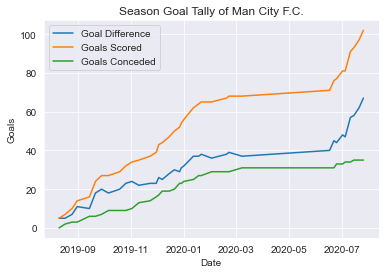

In [201]:
plt.plot(team_df.Date,team_df.GD)
plt.plot(team_df.Date,team_df.Total_GS)
plt.plot(team_df.Date,team_df.Total_GC)
plt.legend(['Goal Difference','Goals Scored','Goals Conceded'])
plt.title('Season Goal Tally of {} F.C.'.format(team))
plt.xlabel('Date')
plt.ylabel('Goals');

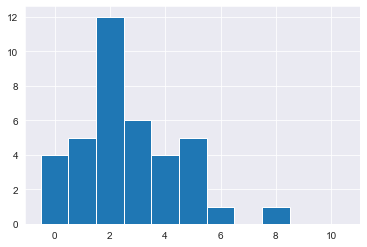

In [202]:
plt.hist(team_df.GS,bins=np.arange(-0.5,11.5,1));

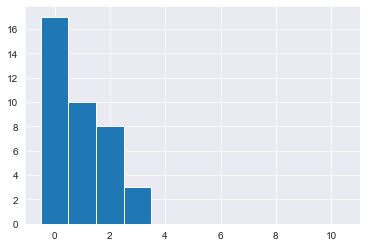

In [203]:
plt.hist(team_df.GC,bins=np.arange(-0.5,11.5,1));

In [205]:
print('In the 2019-20 PL season, {} F.C. scored a goal every {:.0f} minutes and conceded a goal every {:.0f} minutes.'.format(team,90/team_df.GS.mean(),90/team_df.GC.mean()))

In the 2019-20 PL season, Man City F.C. scored a goal every 34 minutes and conceded a goal every 98 minutes.


In [207]:
print("Before COVID break, {} F.C. scored an average of {:.2f} goals per match but after the COVID break they scored an average of {:.2f} goals per match.".format(team,team_df[flag1].GS.mean(),team_df[flag2].GS.mean()))

Before COVID break, Man City F.C. scored an average of 2.43 goals per match but after the COVID break they scored an average of 3.40 goals per match.
<ipython-input-207-0dc4638c9c7e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Before COVID break, {} F.C. scored an average of {:.2f} goals per match but after the COVID break they scored an average of {:.2f} goals per match.".format(team,team_df[flag1].GS.mean(),team_df[flag2].GS.mean()))


In [208]:
points_per_match=(team_df[(team_df.Result=='WIN')].Team.count()*3+team_df[(team_df.Result=='DRAW')].Team.count())/team_df.Team.count()
print("In the 2019-20 PL season {} F.C. won an average of {:.2f} points per Match.".format(team,points_per_match))

In the 2019-20 PL season Man City F.C. won an average of 2.13 points per Match.


C:\Users\utsav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


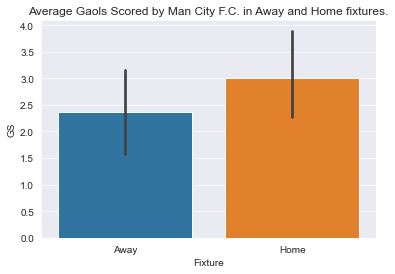

In [209]:
sns.barplot(team_df.Fixture,team_df.GS)
plt.title("Average Gaols Scored by {} F.C. in Away and Home fixtures.".format(team));

C:\Users\utsav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


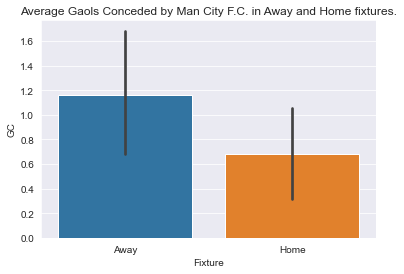

In [210]:
sns.barplot(team_df.Fixture,team_df.GC)
plt.title("Average Gaols Conceded by {} F.C. in Away and Home fixtures.".format(team));

C:\Users\utsav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


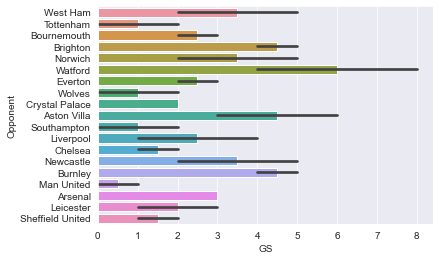

In [211]:
sns.barplot(team_df.GS,team_df.Opponent);

C:\Users\utsav\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


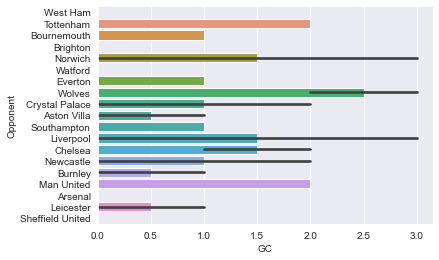

In [212]:
sns.barplot(team_df.GC,team_df.Opponent);

In [213]:
win_p_2=round(team_df[(flag2)&(team_df.Result=='WIN')].Team.count()/team_df[flag2].Team.count()*100,2)
win_p_1=round(team_df[(flag1)&(team_df.Result=='WIN')].Team.count()/team_df[flag1].Team.count()*100,2)

<ipython-input-213-98e9006d574f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_2=round(team_df[(flag2)&(team_df.Result=='WIN')].Team.count()/team_df[flag2].Team.count()*100,2)
<ipython-input-213-98e9006d574f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_1=round(team_df[(flag1)&(team_df.Result=='WIN')].Team.count()/team_df[flag1].Team.count()*100,2)


In [214]:
print("{}'s Win Percentage before COVID break: {} %".format(team,win_p_1))
print("{}'s Win Percentage after COVID break: {} %".format(team,win_p_2))

Man City's Win Percentage before COVID break: 64.29 %
Man City's Win Percentage after COVID break: 80.0 %


In [215]:
win_p_4=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Home')].Team.count()*100,2)
win_p_3=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Home')].Team.count()*100,2)

<ipython-input-215-457dfa68a15f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_4=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Home')].Team.count()*100,2)
<ipython-input-215-457dfa68a15f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_3=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Home')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Home')].Team.count()*100,2)


In [216]:
print("{}'s Win Percentage in Home matches before COVID break: {} %".format(team,win_p_3))
print("{}'s Win Percentage in Home matches after COVID break: {} %".format(team,win_p_4))

Man City's Win Percentage in Home matches before COVID break: 69.23 %
Man City's Win Percentage in Home matches after COVID break: 100.0 %


In [217]:
win_p_2=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Away')].Team.count()*100,2)
win_p_1=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Away')].Team.count()*100,2)

<ipython-input-217-390bcde95414>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_2=round(team_df[(flag2)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag2)&(team_df.Fixture=='Away')].Team.count()*100,2)
<ipython-input-217-390bcde95414>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_p_1=round(team_df[(flag1)&(team_df.Result=='WIN')&(team_df.Fixture=='Away')].Team.count()/team_df[(flag1)&(team_df.Fixture=='Away')].Team.count()*100,2)


In [218]:
print("{}'s Win Percentage in Away matches before COVID break: {} %".format(team,win_p_1))
print("{}'s Win Percentage in Away matches after COVID break: {} %".format(team,win_p_2))

Man City's Win Percentage in Away matches before COVID break: 60.0 %
Man City's Win Percentage in Away matches after COVID break: 50.0 %
